In [48]:
import pandas as pd
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
data = pd.read_csv('train.csv')

# EDA

In [63]:
#В целом посмотрим на данные
data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


- **Id**: общий идентификатор
- **Product ID** : номер оборудования 
- **Type**: Тип оборудования
- **Air temperature**: температура воздуха оборудования	
- **Process temperature**: температура процесса
- **rotational speed [rpm]**: скорость вращения 
- **Torque [Nm]**: крутящийся момент 
- **Tool wear [min]**: Износ инструмента
- **Machine failure**: -**Сбой оборудования**-
- **WF, HDF, PWF, OSF, RNF**: прочие данные (бинарные) влияющие на останов оборудования


In [64]:
#Посмотрим на пропуски и типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [65]:
#статистики всех признаков
data.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
#смотрим на не числовые признаки
data.describe(include=['object', 'bool'])

,Product ID,Type
count,136429,136429
unique,9976,3
top,L53257,L
freq,139,95354


In [67]:
#посмотрим на дубликаты
data.duplicated().sum()


0

In [68]:
data['Product ID']

0         L50096
1         M20343
2         L49454
3         L53355
4         M24050
           ...  
136424    M22284
136425    H38017
136426    L54690
136427    L53876
136428    L47937
Name: Product ID, Length: 136429, dtype: object

#### Предварительные выводы:
- дубликатов нет
- повторов нет
- Тип данных в порядке
- По признакам предварительно (type - через OneHotEncoding)
- Повтор Type в наименование Product ID
- уникальных значений Product_ID=9976, Значения повторяются 1 до 139 раз. Можем предположить, что убрав из кода тип Type, и использовать признак вещественный

### 1) Построим распределение числовых типов данных
- построим гистограмму плотности
- построим  диаграмму размаха
- Сравним гистограммы плотности числовых данных в связи с таргетом "Machine failure"

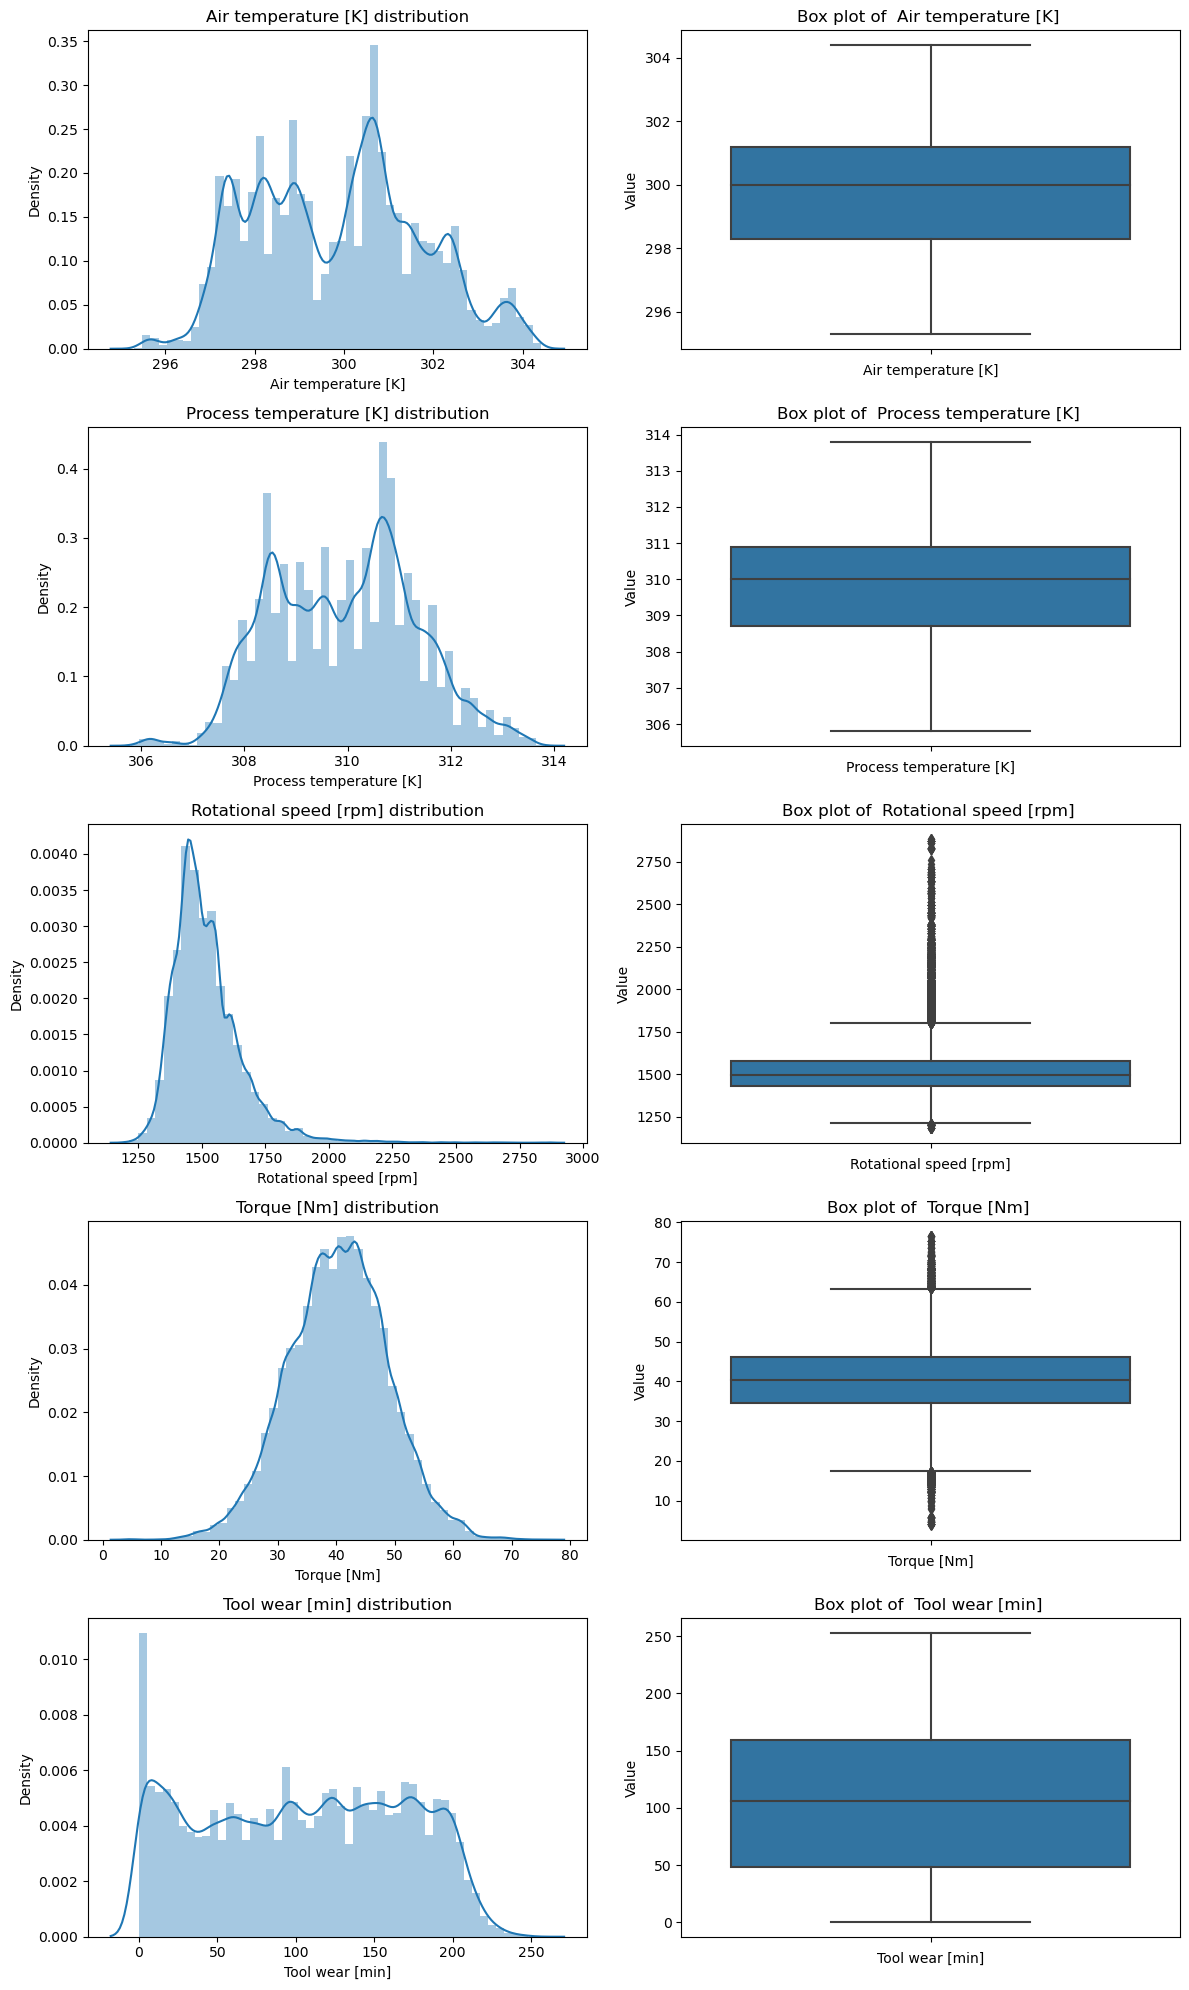

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

num_col = ['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
           'Tool wear [min]']

def plot_histograms(num_col, rows, cols):

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12,20))
    for i, column in enumerate(num_col):
        # Histogram
        ax = axes[i,0]
        sns.distplot(data[column], ax=ax, kde=True)
        
        ax.set_title(f'{column} distribution')
        
        # Box plot
        ax = axes[i,1]
        sns.boxplot(data = data, y=data[column], ax=ax)
        ax.set_title(f'Box plot of  {column} ')
        
        ax.set_xlabel(column)
        ax.set_ylabel('Value')

        
    plt.tight_layout()
    plt.show()
        
plot_histograms(num_col, len(num_col), 2)

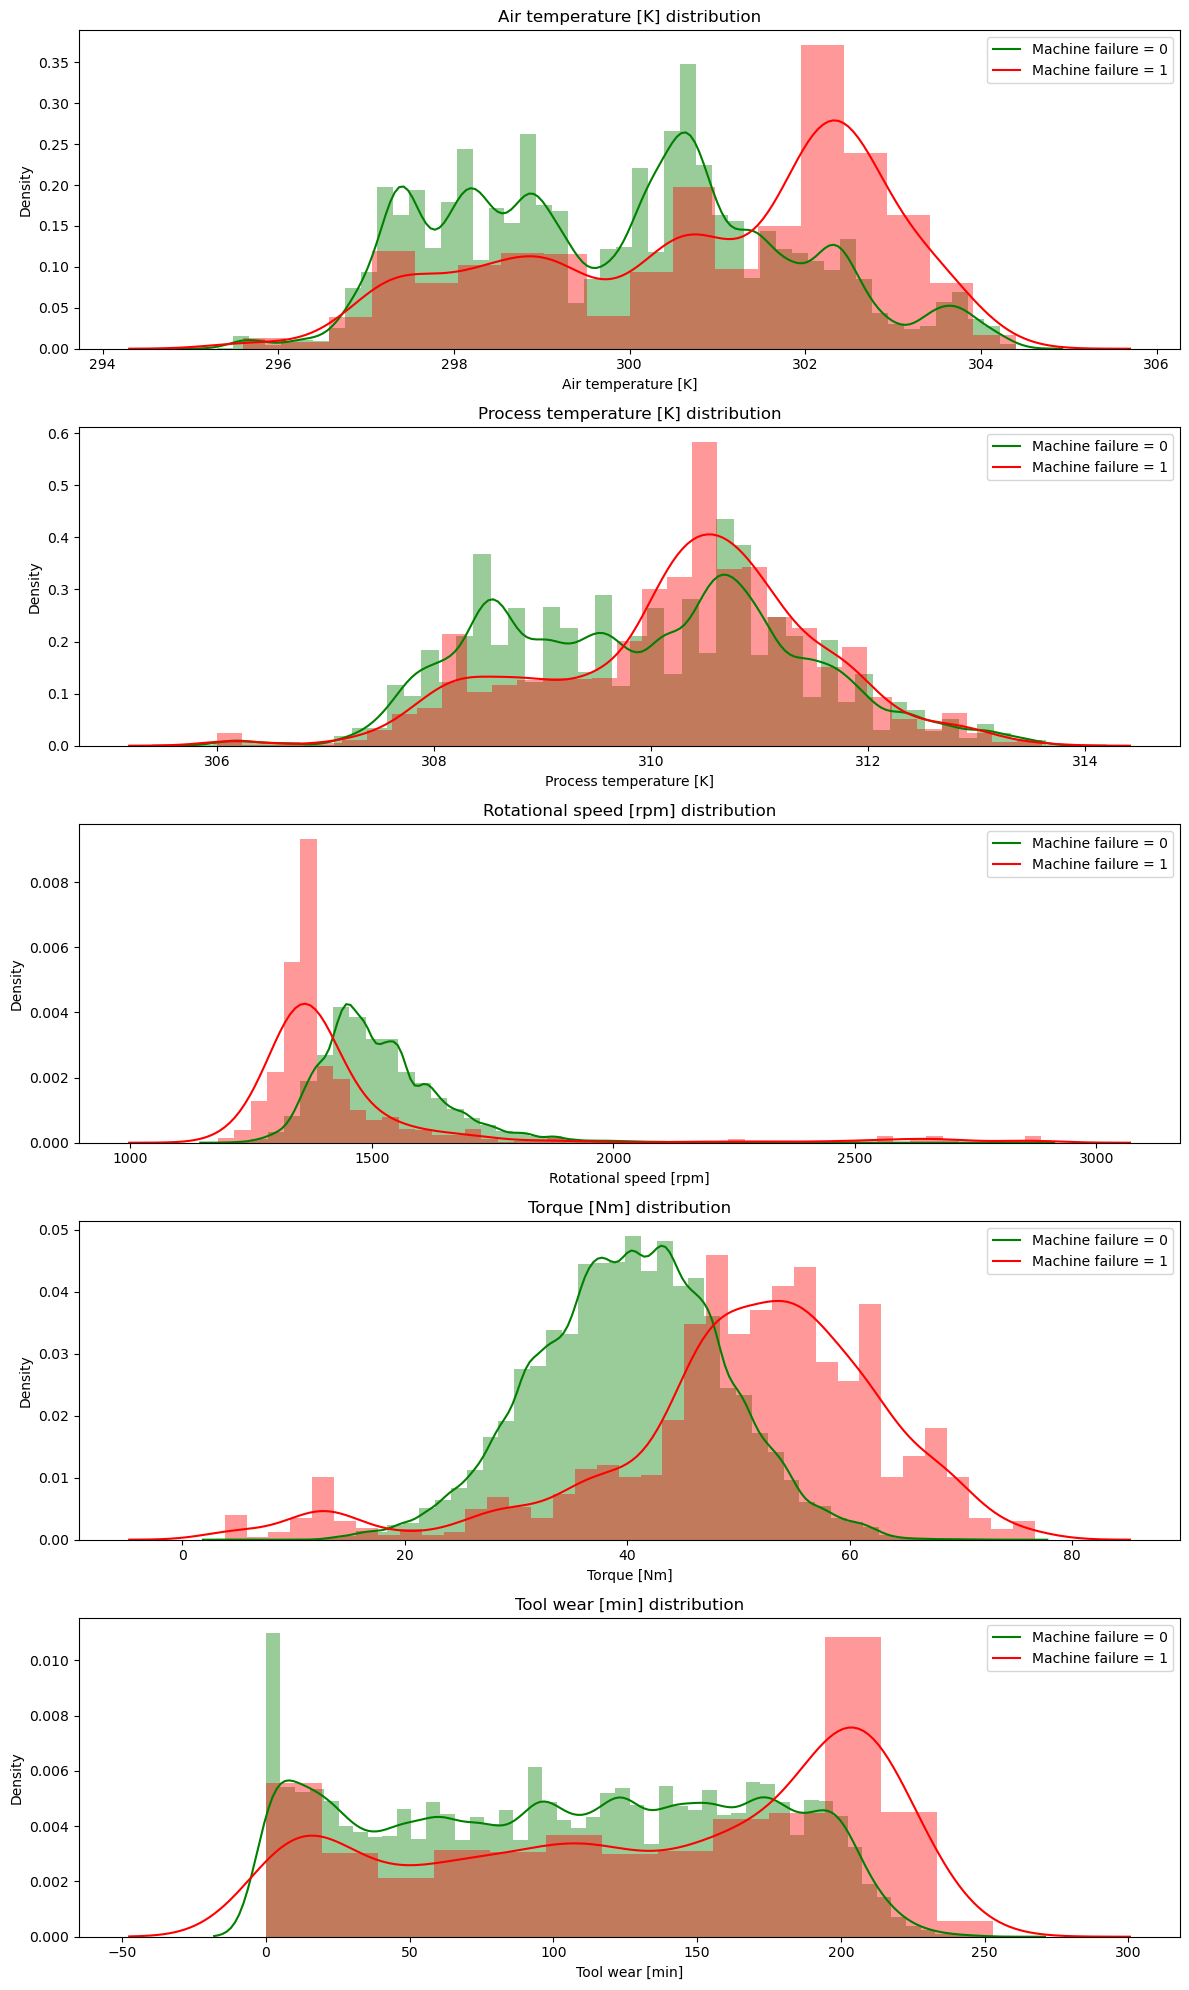

In [14]:
def plot_histograms(num_col, rows, cols):

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12,20))
    for i, column in enumerate(num_col):
        
        # Histogram  'Machine failure' ==== 0
        ax = axes[i]
        sns.distplot(data[data['Machine failure'] == 0][column], ax=ax, kde=True,color='green')
        
       # Histogram  'Machine failure' ==== 1
        sns.distplot(data[data['Machine failure'] == 1][column], ax=ax,color='red')
        ax.set_title(f'{column} distribution')
        ax.legend(['Machine failure = 0', 'Machine failure = 1'])
    

        
    plt.tight_layout()
    plt.show()
        
plot_histograms(num_col, len(num_col), 1)

### Выводы по данным вещественных чисел
- **Air temperature [K]** - распределение сложно назвать нормальным, но стремится к нему, как таковых выбросов нет. Значения 'Machine failure' (далее таргет/отказы) смещены в правую сторону, в зону больших температур
- **Process temperature [K]** - похожая величина предыдущей, скорей всего есть сильная корреляция (проверим позже), также отказы смещены в сторону больших температур
- **Rotational speed [rpm]** - распределение с тяжелым хвостом , стремится к логнормальному. Отказы здесь наоборот смещены к меньшему значению Rotational speed
- **Torque [Nm]** - нормальное распределение. Отказы распределены менее нормально (виднеется тяжелый левый хвост), также данные по отказам смещены правее, что их также выделяет
- **Tool wear [min]** - распределение равномерное. Но присутствует некая взаимосвязь, что при больших значениях вероятность отказа больше

### 2) Построим распределение категориальных (type) и бинарных данных

- построим гистограммы
- Сравним гистограммы в связи таргетом "Machine failure"

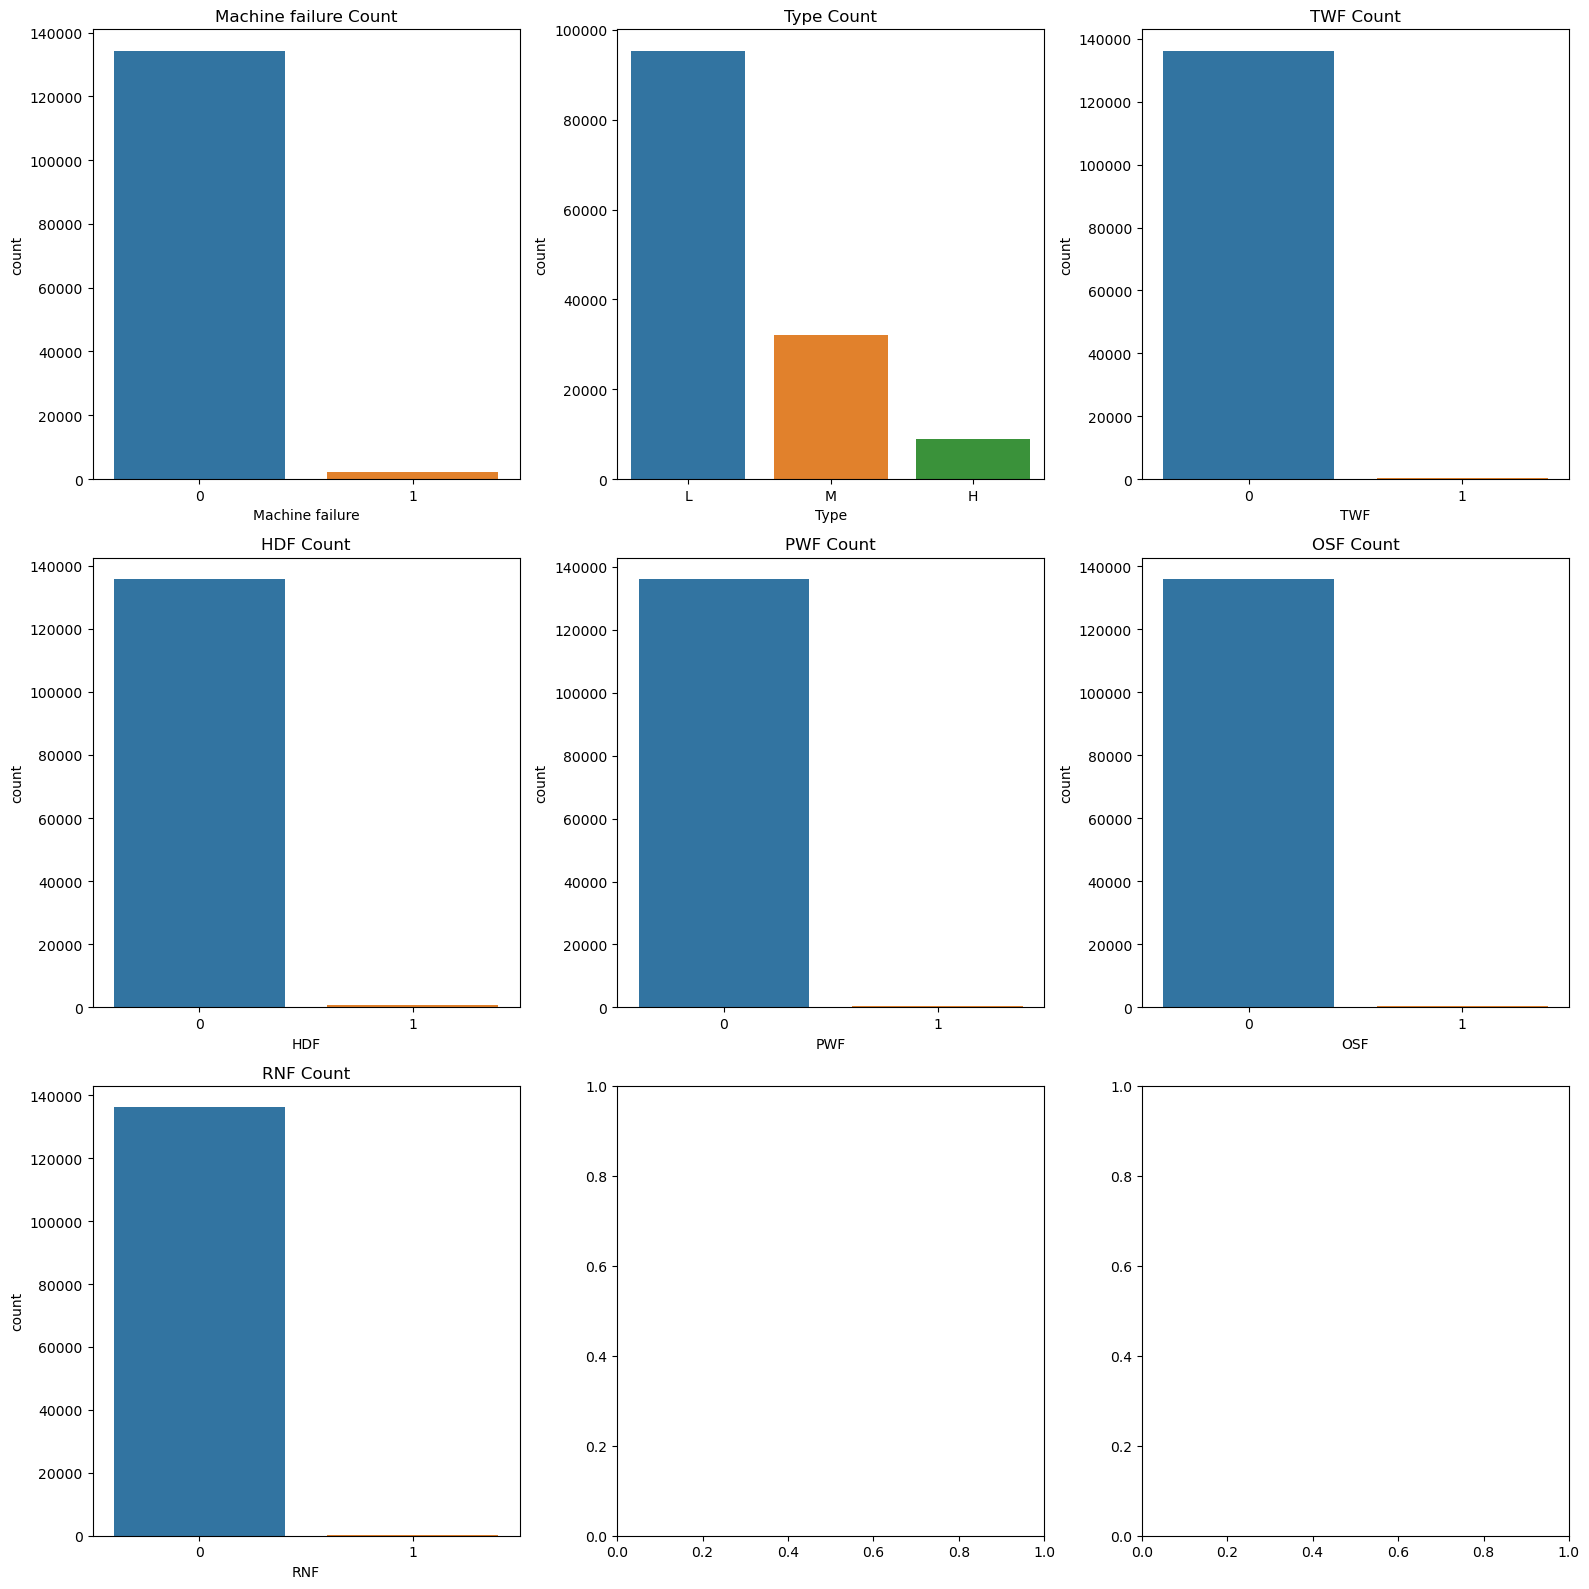

In [15]:
cat_col = ['Machine failure', 'Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

def plot_histograms(num_col, rows, cols):
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,16))
    ax = ax.flatten()
       
    for i, column in enumerate(num_col):
        # Histogram
        sns.countplot(x=data[column], ax=ax[i])
        ax[i].set_title(f'{column} Count')
      
    plt.tight_layout()
    plt.show()
        
plot_histograms(cat_col, 3, 3)

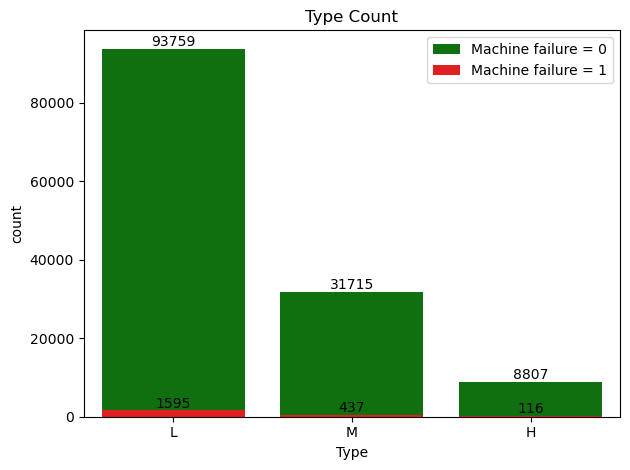

In [16]:
def plot_histograms(cat_col, rows, cols):
    # Histogram  'Machine failure' ==== 0
    ax = sns.countplot(data[data['Machine failure'] == 0]['Type'], color='green')
        
    # Histogram  'Machine failure' ==== 1
    sns.countplot(data[data['Machine failure'] == 1]['Type'],color='red')
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
        
    ax.set_title(f'Type Count')
    ax.legend(['Machine failure = 0', 'Machine failure = 1'])
    

        
    plt.tight_layout()
    plt.show()



        
#plot_histograms(cat_col, 3, 3)
plot_histograms(cat_col[1:], len(cat_col[1:]), 1)

In [17]:
print(f"Общий дисбаланс классов {round((data[data['Machine failure'] == 0].shape[0])/(data[data['Machine failure'] == 1].shape[0]),2)}")


Общий дисбаланс классов 62.51


### Выводы по данным ,категориальным признакам
- Мы имеем большой дисбаланс классов в 62 раза
- пропорциональность сохраняется по всем бинарным признаками и в том числе категориальным type

<AxesSubplot:>

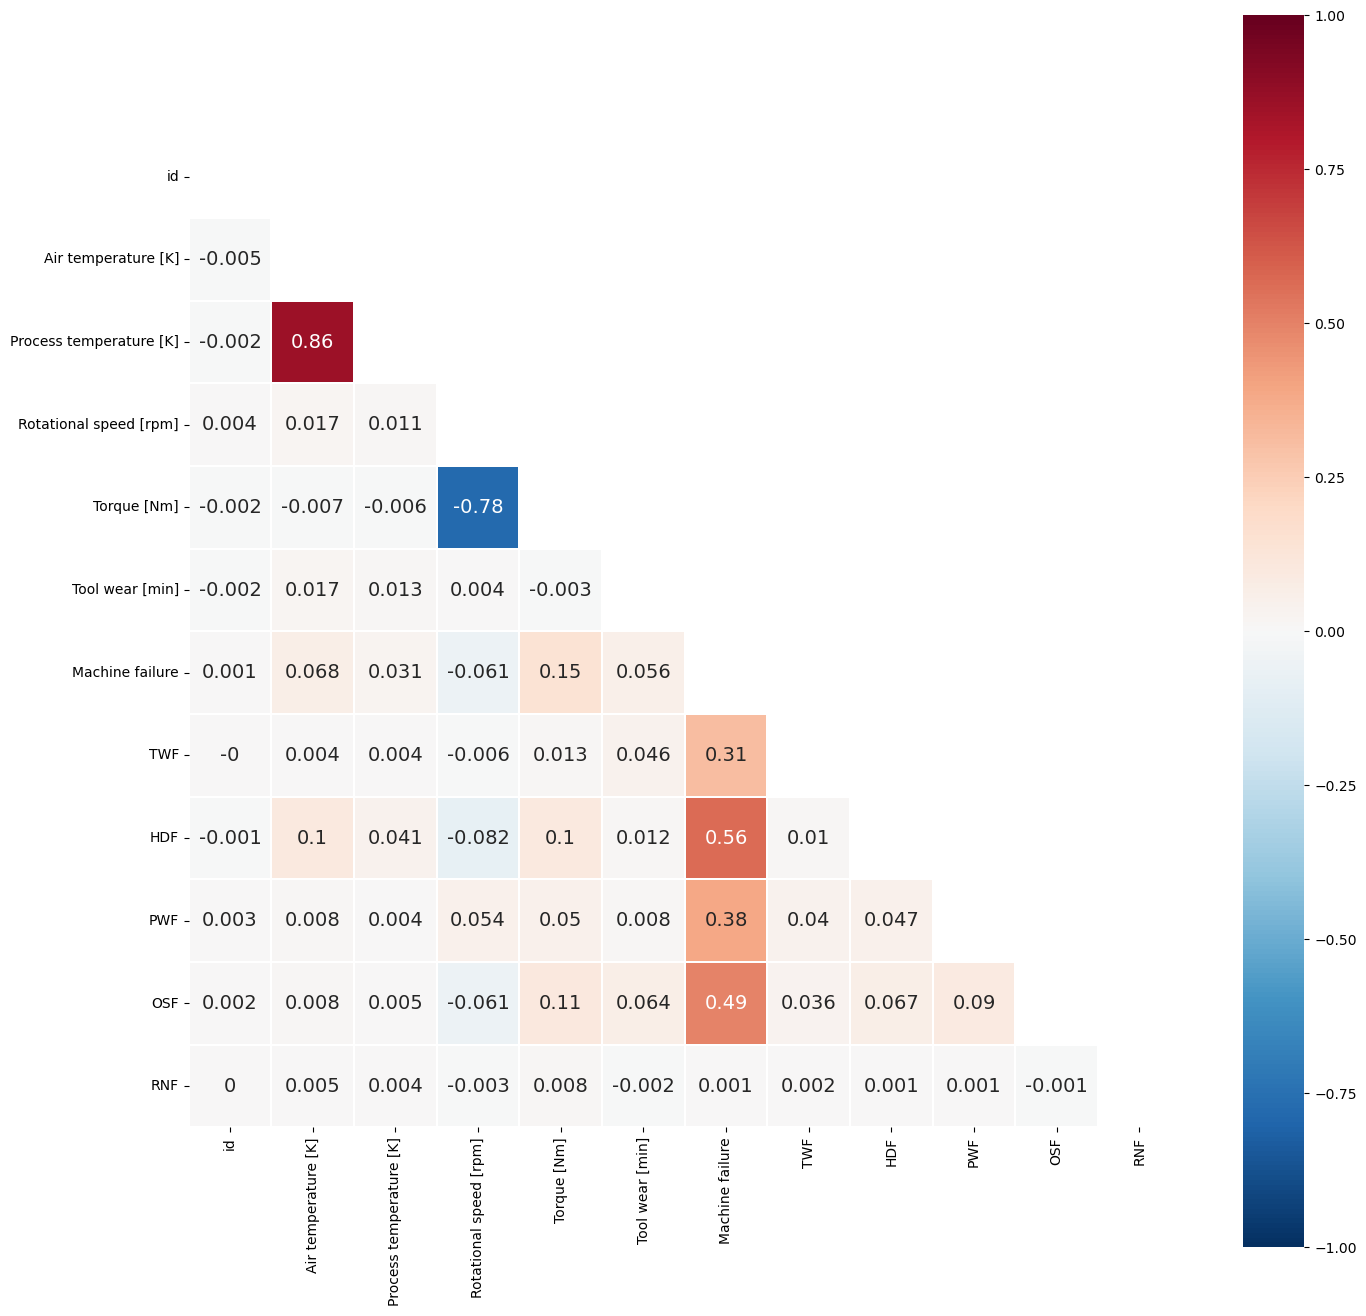

In [21]:
corr_matrix = data.corr().round(3)
colormap = plt.cm.RdBu_r
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix,linewidths=0.1, vmax=1.0, vmin=-1.0, annot = True, 
            linecolor='white',cmap= colormap, square = True, fmt='.2g', annot_kws={"size": 14}, mask = mask)

### Выводы корреляции
- Proc temp достаточно сильно коррелирует с Air temp
- Все бинарные данные имеют корреляцию с таргетом, больше чем все остольное признаки

### Preprocessing data

- 1) Закодируем Type - OneHotencoding
- 2) Product ID - преобразовали уже, будем использотвать как числовое значение, исключим первую букву.
- 2) Масштабируем наши числовые данные данные
- 3) Пообучаем модель на разных моделях, поищим лучшеи гиперпараметры
- 4) Включим в ход features engineering (создание признаков на основании зависимости признаков имеющихся) ) 

In [108]:
df = data.copy()
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [109]:
1# Изменим наименование столбцов, чтобы "некоторые" модели не ругались
df = df.rename(columns = {'Product ID':'Product_id', 'Air temperature [K]':'Air_temp','Process temperature [K]':'Proc_temp', 'Rotational speed [rpm]': 'Rot_speed', 'Torque [Nm]':'Torque', 'Tool wear [min]':'Tool_wear', 'Machine failure':'Target' })
2# Удалим лишний столбц id
df = df.drop(columns='id')

In [110]:
3# Исключим первую букву из Product ID
df["Product_id"] = pd.to_numeric(df["Product_id"].str.slice(start=1))

In [111]:
4# type через one-hot-encoding
one_hot = pd.get_dummies(df['Type'], prefix='Type', drop_first=True)
df = pd.concat((df.drop('Type', axis=1), one_hot), axis=1)

In [112]:
#5 Промаштабируем наши числовые данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Product_id','Air_temp','Proc_temp','Rot_speed','Torque','Tool_wear']] = scaler.fit_transform(df[['Product_id','Air_temp','Proc_temp','Rot_speed','Torque','Tool_wear']])

In [113]:
df.head()

,Product_id,Air_temp,Proc_temp,Rot_speed,Torque,Tool_wear,Target,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,0.453780,0.395880,-0.246230,0.545416,-0.499711,0.556417,0,0,0,0,0,0,1,0
1,-1.653456,1.469856,1.558605,1.720308,-1.323028,1.494433,0,0,0,0,0,0,0,1
2,0.408311,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,0,0,0,0,0,0,1,0
3,0.684597,0.610675,0.692284,0.026445,0.464745,1.447532,0,0,0,0,0,0,1,0
4,-1.390910,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,0,0,0,0,0,0,0,1


<AxesSubplot:>

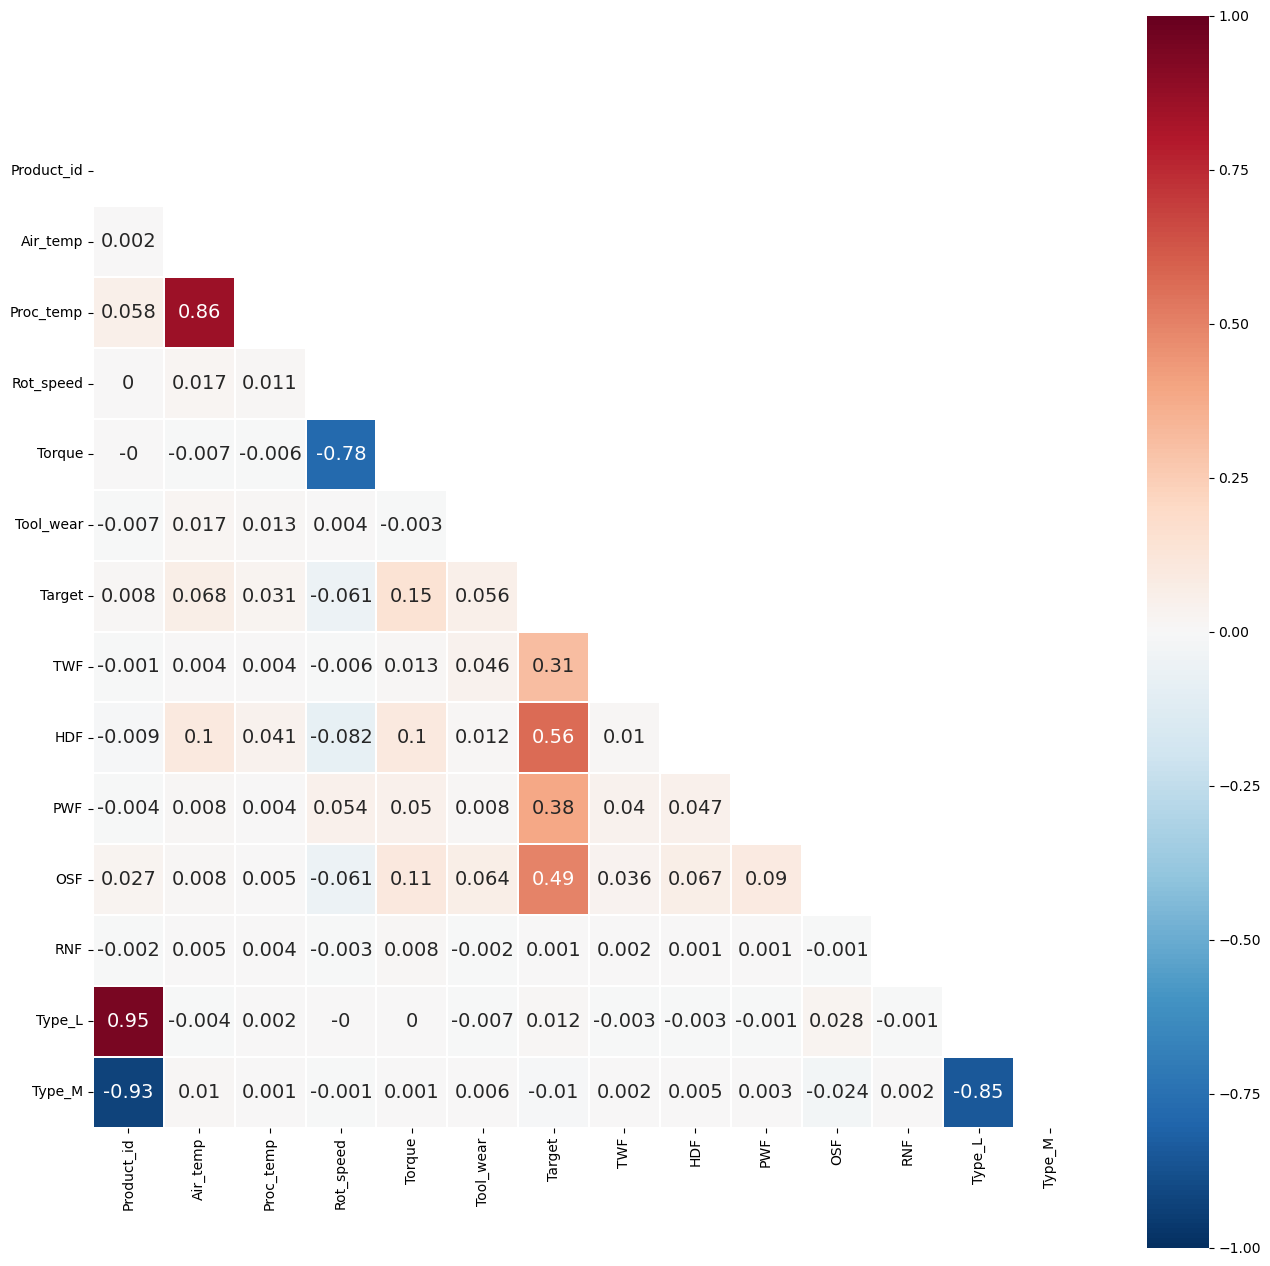

In [114]:
corr_matrix = df.corr().round(3)
colormap = plt.cm.RdBu_r
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix,linewidths=0.1, vmax=1.0, vmin=-1.0, annot = True, 
            linecolor='white',cmap= colormap, square = True, fmt='.2g', annot_kws={"size": 14}, mask = mask)